# Data Directory Preparation
## For Keras ImageDataGenerator's flow_from_directory method 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
base_dir = "X:/train-scene classification/"
orig_train_dir = "X:/train-scene classification/train/"

### Test image extraction

In [3]:
test_list_df = pd.read_csv(os.path.join(base_dir, 'test_images.csv'))
print(test_list_df.head())

  image_name
0      3.jpg
1      5.jpg
2      6.jpg
3     11.jpg
4     14.jpg


In [4]:
test_list = test_list_df.image_name.values
print(test_list[:10])

['3.jpg' '5.jpg' '6.jpg' '11.jpg' '14.jpg' '22.jpg' '25.jpg' '28.jpg'
 '30.jpg' '38.jpg']


360.jpg


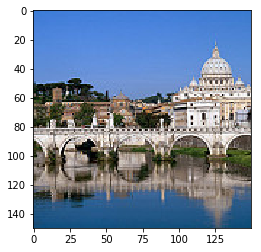

In [9]:
for i, im in enumerate(test_list):
    img = cv2.imread(os.path.join(orig_train_dir, im))
    if i == 101:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        print(im)
    cv2.imwrite(os.path.join(base_dir, 'data', 'test', im), img)

### Validation image extraction